# Cat-Dog Image Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import os

data_dir = '../../data/'
classes = os.listdir(data_dir)

# read images files that were read on opencv without error
file_dirs = pd.read_csv('../01-data-exploration/file_dirs.csv', header=None).values
file_dirs = np.ravel(file_dirs)

file_dirs = file_dirs[:300]   # reduce dataset for testing

file_dirs[:10]

array(['../../data/Cat/0.jpg', '../../data/Cat/1.jpg',
       '../../data/Cat/10.jpg', '../../data/Cat/100.jpg',
       '../../data/Cat/1000.jpg', '../../data/Cat/10000.jpg',
       '../../data/Cat/10001.jpg', '../../data/Cat/10002.jpg',
       '../../data/Cat/10003.jpg', '../../data/Cat/10004.jpg'],
      dtype=object)


LABEL : Cat


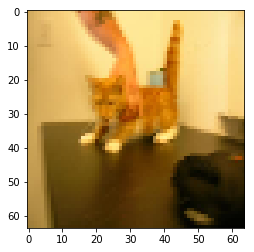


Raw data (first image):


array([[[ 90., 167., 206.],
        [ 96., 173., 212.],
        [101., 180., 221.],
        ...,
        [137., 214., 247.],
        [128., 208., 246.],
        [123., 203., 242.]],

       [[ 91., 168., 207.],
        [ 97., 174., 213.],
        [101., 180., 221.],
        ...,
        [141., 216., 248.],
        [133., 211., 247.],
        [127., 206., 244.]],

       [[ 91., 168., 207.],
        [ 97., 174., 213.],
        [101., 180., 221.],
        ...,
        [142., 216., 246.],
        [139., 215., 247.],
        [131., 209., 247.]],

       ...,

       [[ 59., 127., 162.],
        [ 63., 131., 166.],
        [ 63., 134., 171.],
        ...,
        [  0.,   4.,   3.],
        [  0.,   4.,   3.],
        [  0.,   3.,   2.]],

       [[ 57., 125., 160.],
        [ 59., 127., 162.],
        [ 59., 130., 167.],
        ...,
        [  0.,   4.,   3.],
        [  0.,   4.,   3.],
        [  0.,   3.,   2.]],

       [[ 56., 123., 154.],
        [ 60., 127., 158.],
        [ 58., 1

In [2]:
%matplotlib inline
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import cv2

# deploy a progress bar
try:
    from tqdm.notebook import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

# this will store the information from every image
X = []  # feature
y = []  # labels

channels = 3         # three colors: RGB
image_size = 64      # image will be converted to 64x64 images
n_images = len(file_dirs)

X = np.ndarray(shape=(n_images, image_size, image_size, channels), dtype=np.float32)
img_counter = 0

for fname in tqdm(file_dirs):
    # read every single image as an array
    image = cv2.imread(fname, 1)
    
    # resize every image to the desired size
    image = cv2.resize(image,(image_size,image_size))

    # build the list with feature data [RGB values]
    X[img_counter, :, :, :] = image

    # build the list with labels [cats | dogs]
    class_name = fname.split('/')[-2]
    y.append(class_name)

    img_counter += 1


# remove empty arrays
X = X[:n_images]

# plot a sample from the list of images [features]
print('LABEL : ' + y[0])
plt.imshow(cv2.cvtColor(X[0], cv2.COLOR_BGR2RGB).astype(np.uint8))
plt.show()

print('\nRaw data (first image):')
X[0]

In [3]:
print('samples, width, height. channels')
X.shape

samples, width, height. channels


(300, 64, 64, 3)